<a href="https://colab.research.google.com/github/abhimaan-git/My_ANN_using_A_Dataset.ipynb/blob/main/My_ANN_using_A_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')

print("GPU:", tf.config.list_physical_devices('GPU'))
print("Num GPUs:", len(physical_devices))

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs: 1


In [101]:
!pip install tensorflow-gpu


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [102]:
# prompt: install tensorflow-gpu

!pip install tensorflow-gpu


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [103]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [104]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [105]:
#importing some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [106]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [107]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [108]:
# converting to independent(X) and dependent features (y)
X= dataset.iloc[:,3:13]  #all the row and 3 to 12th column
y=dataset.iloc[:,13]

In [109]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [110]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [111]:
## Feature engineering ----- fro handling all the categorical features

In [112]:
pd.get_dummies(X['Geography'] , dtype=int)

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [113]:
geography=pd.get_dummies(X['Geography'] , drop_first = True  , dtype=int)

In [114]:
gender=pd.get_dummies(X['Gender'] , dtype=int,  drop_first = True )

In [115]:
#concatinating these variables with the dataframe

In [116]:
X.drop(['Geography','Gender'] , axis =1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [117]:
X=pd.concat([X,geography,gender],axis=1)

In [118]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [119]:
#splitting the dataset to training and test set

In [120]:
from sklearn.model_selection import train_test_split

X_train ,X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 ,random_state = 0)

In [135]:
df1=pd.DataFrame(X_train)
df2=pd.DataFrame(X_test)

In [136]:
non_numeric_cols1 = df1.select_dtypes(include=["object"]).columns.tolist()
print(non_numeric_cols1)

non_numeric_cols2 = df2.select_dtypes(include=["object"]).columns.tolist()
print(non_numeric_cols2)

['Geography', 'Gender']
[]


In [137]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col1 in non_numeric_cols1:
  X_train[col1] = le.fit_transform(X_train[col1])


In [138]:

for col2 in non_numeric_cols2:
    X_test[col2] = le.fit_transform(X_test[col2])

In [139]:
#fetaure scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [140]:
X_train

array([[ 0.16958176,  1.51919821, -1.09168714, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.3131264 ,  0.91601335, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.89294542, -1.09168714, ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.89294542,  0.91601335, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521,  1.51919821, -1.09168714, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.3131264 , -1.09168714, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [141]:
X_test

array([[-0.55204276,  0.3131264 , -1.09168714, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297, -0.89294542, -1.09168714, ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  1.51919821, -1.09168714, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227,  1.51919821,  0.91601335, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991,  0.3131264 ,  0.91601335, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688,  0.3131264 ,  0.91601335, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [142]:
X_train.shape , X_test.shape

((8000, 13), (2000, 13))

In [143]:
### part 2 ???? Now lets create the ANN
from tensorflow.keras.models import Sequential                                   # for forward and backward propagation
from tensorflow.keras.layers import Dense                                         # foe hidden layers and output layers
from tensorflow.keras.layers import LeakyReLU , PReLU , ELU , ReLU                #activation functions
from tensorflow.keras.layers import Dropout                                        #



In [144]:
### Lets initialize the ANN
classifier = Sequential()

In [145]:
## Adding the input layer
classifier.add(Dense(units=13, activation ='relu'))

In [146]:
# adding the first hidden layer
classifier.add(Dense(units=7,activation = 'relu' ))
classifier.add(Dropout(0.2))

In [147]:
#adding the second hidden layer
classifier.add(Dense(units=6 , activation ='relu'))

In [148]:
# adding the output layer
classifier.add(Dense(1, activation ='sigmoid'))

In [149]:
# training the entire neural network
classifier.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])   #by default the ADAM optimizer uses learning rate (α) =0.1 ,  we can redefine it as well

In [150]:
import tensorflow
tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [151]:
# Early Stopping  [Stop training when a monitored metric has stopped improving, and we will get at which epoch it became stagnant]
import tensorflow as tf

import keras
# import keras.utils
# from keras import utils as np_utils

early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [152]:
model_history = classifier.fit(X_train,y_train, validation_split =0.33 , batch_size = 10 , epochs =1000 , callbacks= early_stopping)

Epoch 1/1000
536/536 [==============================] - 6s 5ms/step - loss: 0.5054 - accuracy: 0.7903 - val_loss: 0.4588 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4506 - accuracy: 0.7994 - val_loss: 0.4436 - val_accuracy: 0.7970
Epoch 3/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.4354 - accuracy: 0.8074 - val_loss: 0.4351 - val_accuracy: 0.8084
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4262 - accuracy: 0.8082 - val_loss: 0.4295 - val_accuracy: 0.8084
Epoch 5/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4193 - accuracy: 0.8184 - val_loss: 0.4207 - val_accuracy: 0.8141
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4056 - accuracy: 0.8237 - val_loss: 0.4096 - val_accuracy: 0.8213
Epoch 7/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3864 - accuracy: 0.8345 - val_loss: 0.3930 - val_accuracy:

In [153]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

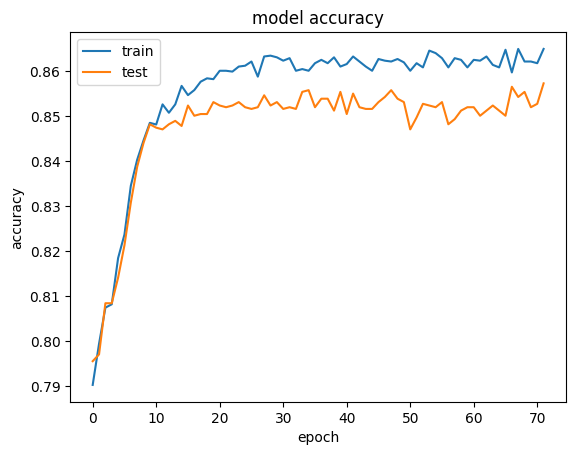

In [154]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

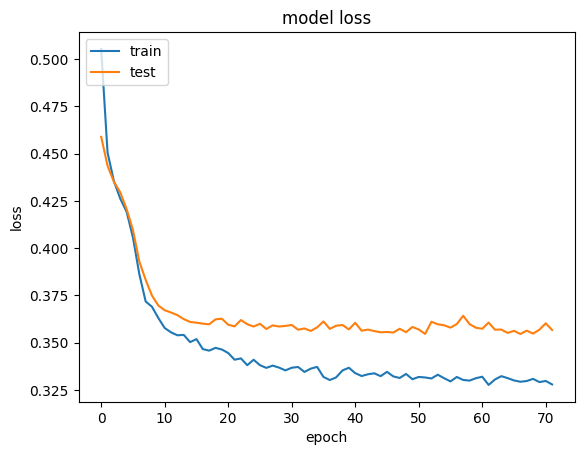

In [155]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [156]:
#prediction for the test data and evaluating the model

y_pred = classifier.predict(X_test)
y_pred =(y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [157]:
#making the confusion metricxs
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1513,   82],
       [ 203,  202]])

In [158]:
from sklearn.metrics import accuracy_score

In [159]:
score = accuracy_score(y_pred, y_test)

In [160]:
score

0.8575

In [161]:
# get the weights
classifier.get_weights()

[array([[ 0.29525706, -0.00957   , -0.26014367, -0.11210553, -0.1371652 ,
         -0.05336315, -0.17519051, -0.06963444,  0.31482923, -0.07271887,
         -0.07449114,  0.07230537, -0.0694114 ],
        [-0.31630856, -0.23791365, -0.41160634, -0.02875543, -0.4429038 ,
          0.5856013 , -0.04429006,  0.20856997, -0.15995947,  0.24124227,
         -0.11485688,  0.42287022,  0.05130909],
        [-0.08559621,  0.14199953,  0.03056563,  0.69485056,  0.21487138,
          0.42262846, -0.1862841 , -0.33435515,  0.5196375 , -0.33665648,
          0.00763274,  0.15546499,  0.05061663],
        [-0.7022024 , -0.04761508, -0.15812154, -0.23442084,  0.99783313,
         -0.27647457, -0.5777328 , -0.5818063 , -0.57374483, -0.05798707,
          0.62935764, -0.5142392 , -0.03197908],
        [-0.19989896,  0.01207536, -0.01857452,  0.30484238,  0.06286271,
          0.1904605 , -0.20566504,  0.22637148, -0.05875726, -0.00297453,
          0.03049268,  0.04823221, -0.04063736],
        [-0.296